Generate random geographic coordinates and the nearest city to each latitude and longitude combination is provided.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from scipy.stats import pearsonr


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the city list using citypy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [3]:
#Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create parameters for the API request
    params = {
        "q": city,
        "appid": weather_api_key
    }

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count + 1} of Set {set_count} | {city}")

    try:
        response = requests.get(url, params=params)

        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print("City not found. Skipping...")
    except:
        print(f"An error occurred while fetching data for {city}")

    # Increment the record count
    record_count += 1

# Indicate that Data Retrieval is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")




Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | ust-tsilma
Processing Record 3 of Set 1 | mandera
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | boguchany
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | kotri
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | dawei
Processing Record 13 of Set 1 | chichiriviche
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | vorkuta
Processing Record 17 of Set 1 | homer
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | ust-nera
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,251.16,64,40,7.72,GL,1706904764
1,ust-tsilma,65.4410,52.1498,265.04,93,100,4.24,RU,1706904764
2,mandera,3.9366,41.8670,307.76,29,100,2.24,KE,1706904765
3,port-aux-francais,-49.3500,70.2167,280.86,95,56,8.07,TF,1706904765
4,chonchi,-42.6128,-73.8092,292.71,47,80,4.16,CL,1706904765


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,251.16,64,40,7.72,GL,1706904764
1,ust-tsilma,65.4410,52.1498,265.04,93,100,4.24,RU,1706904764
2,mandera,3.9366,41.8670,307.76,29,100,2.24,KE,1706904765
3,port-aux-francais,-49.3500,70.2167,280.86,95,56,8.07,TF,1706904765
4,chonchi,-42.6128,-73.8092,292.71,47,80,4.16,CL,1706904765


Create the Scattered Plot Requested
Latitude vs Temperature

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

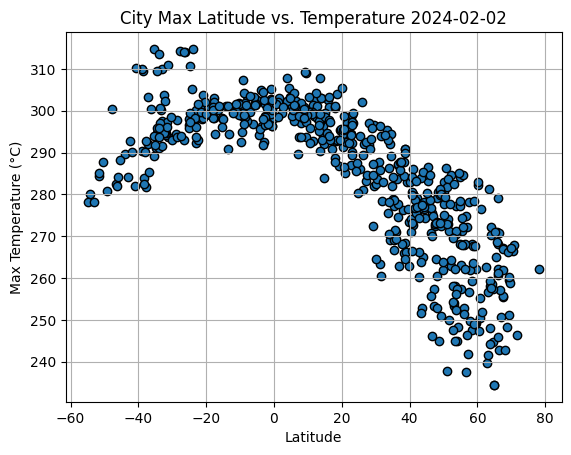

In [9]:
# Assuming you have a city_df DataFrame with the required columns

# Extract latitude and temperature data from the DataFrame
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
date_now = datetime.datetime.now().date()




# Create the scatter plot
plt.scatter(latitude, temperature, edgecolor='black')

# Set the labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title(f"City Max Latitude vs. Temperature {date_now}")
#plt.title('City Max Latitude vs. Temperature ' + (str(date_now)))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

Latitude vs Humidity

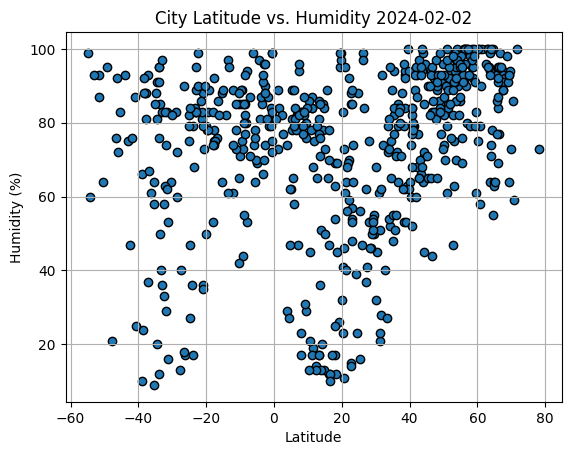

In [10]:
# Assuming you have a city_df DataFrame with the required columns

# Extract latitude and humidity data from the DataFrame
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
date_now = datetime.datetime.now().date()



# Create the scatter plot
plt.scatter(latitude, humidity, edgecolor='black')

# Set the labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity {date_now}")
#plt.title('City Latitude vs. Humidity'+ (str(date_now)))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

Latitude vs Cloudiness

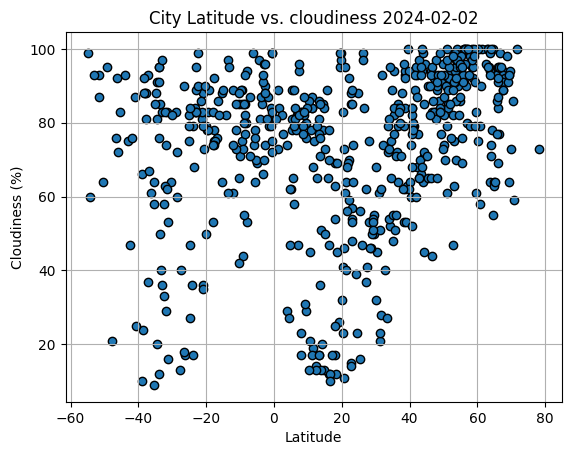

In [11]:
# Assuming you have a city_df DataFrame with the required columns

# Extract latitude and cloudiness data from the DataFrame
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
date_now = datetime.datetime.now().date()



# Create the scatter plot
plt.scatter(latitude, humidity, edgecolor='black')

# Set the labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.title(f"City Latitude vs. cloudiness {date_now}")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

Latitude vs Wind Speed Plot

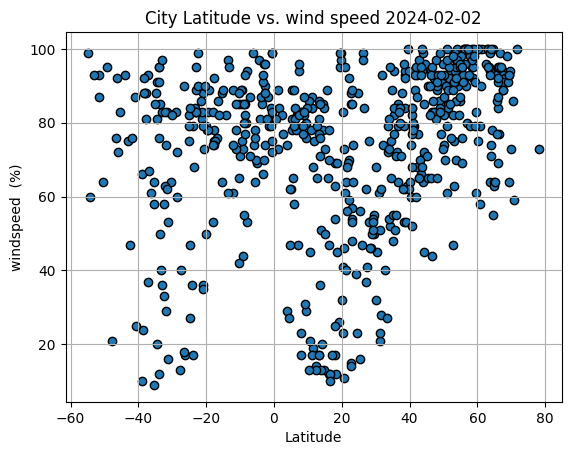

In [12]:
# Assuming you have a city_df DataFrame with the required columns

# Extract latitude and cloudiness data from the DataFrame
latitude = city_data_df['Lat']
windspeed = city_data_df['Wind Speed']
date_now = datetime.datetime.now().date()



# Create the scatter plot
plt.scatter(latitude, humidity, edgecolor='black')

# Set the labels and title
plt.xlabel('Latitude')
plt.ylabel('windspeed  (%)')
#used "f" function to display date
plt.title(f"City Latitude vs. wind speed {date_now}")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE



def linear_regression(x_values, y_values, xlabel, ylabel, hemisphere, text_coordination, ylim=None):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept))
    
    # Generate plots
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    plt.scatter(x_values, y_values, color='blue')
    plt.plot(x_values, regress_values, "r-")
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere - {xlabel} vs. {ylabel}")
    
    # Add line equation to plot
    plt.annotate(line_equation, text_coordination, fontsize=12, color='red')
    
    # Set y-axis limits if specified
    if ylim:
        plt.ylim(ylim)
    
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,251.16,64,40,7.72,GL,1706904764
1,ust-tsilma,65.4410,52.1498,265.04,93,100,4.24,RU,1706904764
2,mandera,3.9366,41.8670,307.76,29,100,2.24,KE,1706904765
5,udachny,66.4167,112.4000,242.70,77,88,1.36,RU,1706904766
6,boguchany,58.3814,97.4531,247.51,100,87,0.89,RU,1706904767


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,280.86,95,56,8.07,TF,1706904765
4,chonchi,-42.6128,-73.8092,292.71,47,80,4.16,CL,1706904765
7,grytviken,-54.2811,-36.5092,280.15,60,98,6.98,GS,1706904768
8,waitangi,-43.9535,-176.5597,289.72,93,100,1.79,NZ,1706904769
10,ushuaia,-54.8000,-68.3000,278.18,99,100,1.65,AR,1706904772


Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot

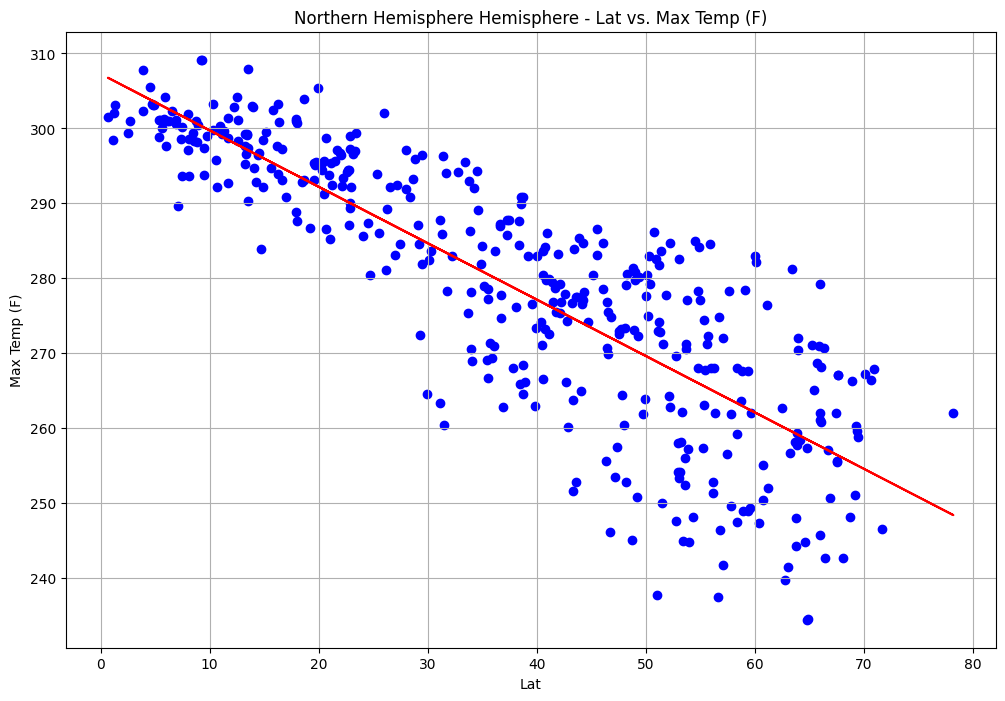

The r-value is: -0.8408982123133866


In [16]:
# Linear regression on Northern Hemisphere
# Create x_values and y_values

x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]

#linear_regression(x_values,y_values, "Lat", "Max Temp (F)")
linear_regression(x_values, y_values, "Lat", "Max Temp (F)", "Northern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)


Southern Hemisphere: Temperature vs. Latitude Linear Regression Plot

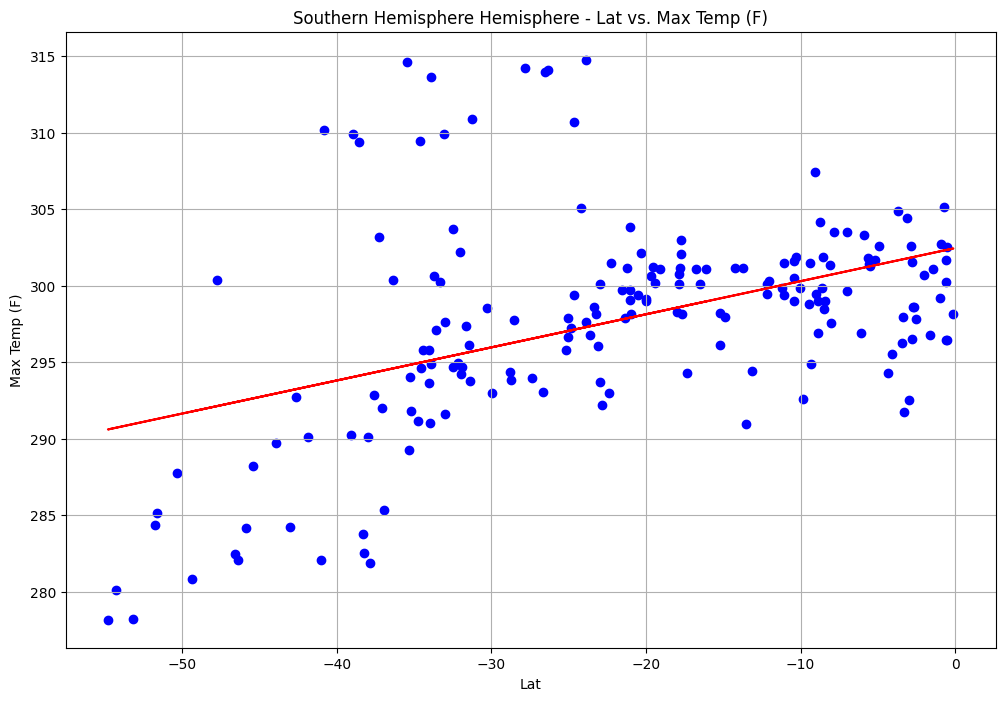

The r-value is: 0.44347788341244027


In [17]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]

#linear_regression(x_values,y_values, "Lat", "Max Temp (F)")
linear_regression(x_values, y_values, "Lat", "Max Temp (F)", "Southern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

Linear regression or correlation between latitude and maximun temperature is strong for both northern and southern hemisphere. However, northern hemisphere r-value is higher, indicating maximum temperature keep dropping in a linear manner.

Northern Hemisphere: Humidity vs. Latitude Linear regression plot

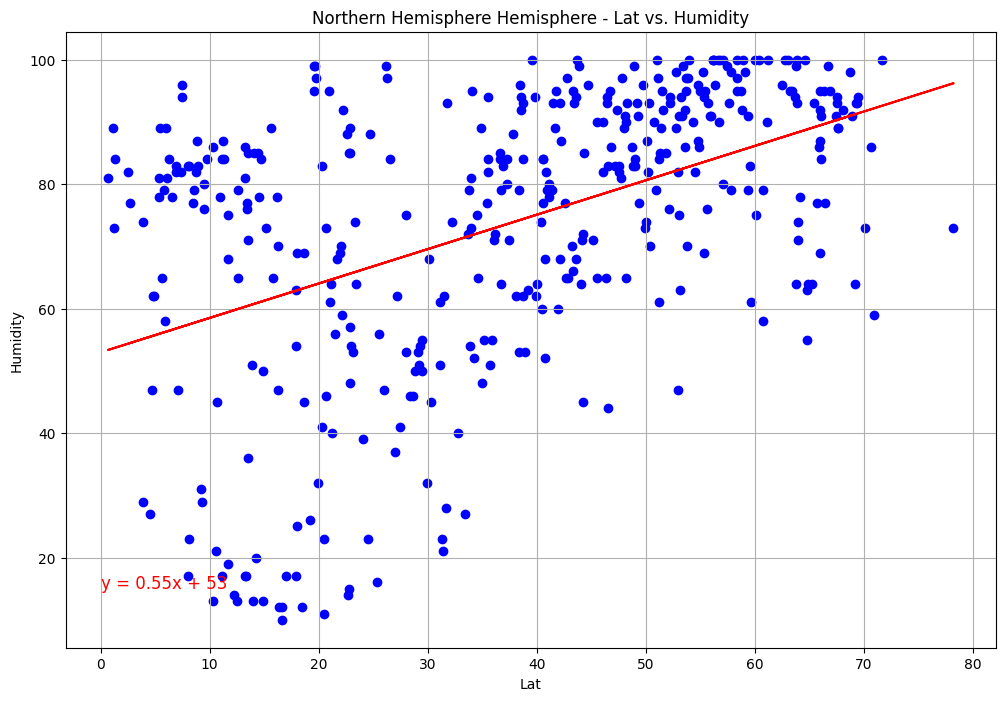

The r-value is: 0.46746590300236535


In [18]:
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]

#linear_regression(x_values,y_values, "Lat", "Max Temp (F)")
linear_regression(x_values, y_values, "Lat", "Humidity", "Northern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

Southern Hemisphere: Humidity vs. Latitude

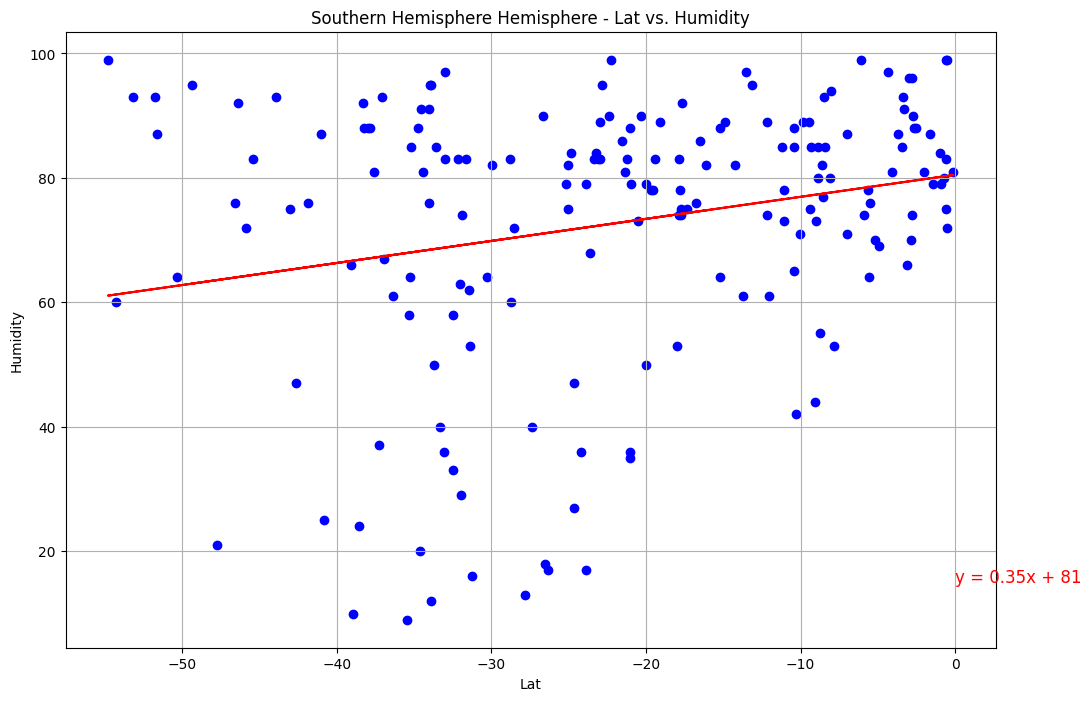

The r-value is: 0.23359240303207035


In [19]:
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]

#linear_regression(x_values,y_values, "Lat", "Max Temp (F)")
linear_regression(x_values, y_values, "Lat", "Humidity", "Southern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

There is no correlation between latitude and humidity for southern hemisphere. There is some correlation for northern hemisphere, but not that strong. It is higher latitude.

Northern Hemisphere: Cloudiness vs. Latitude

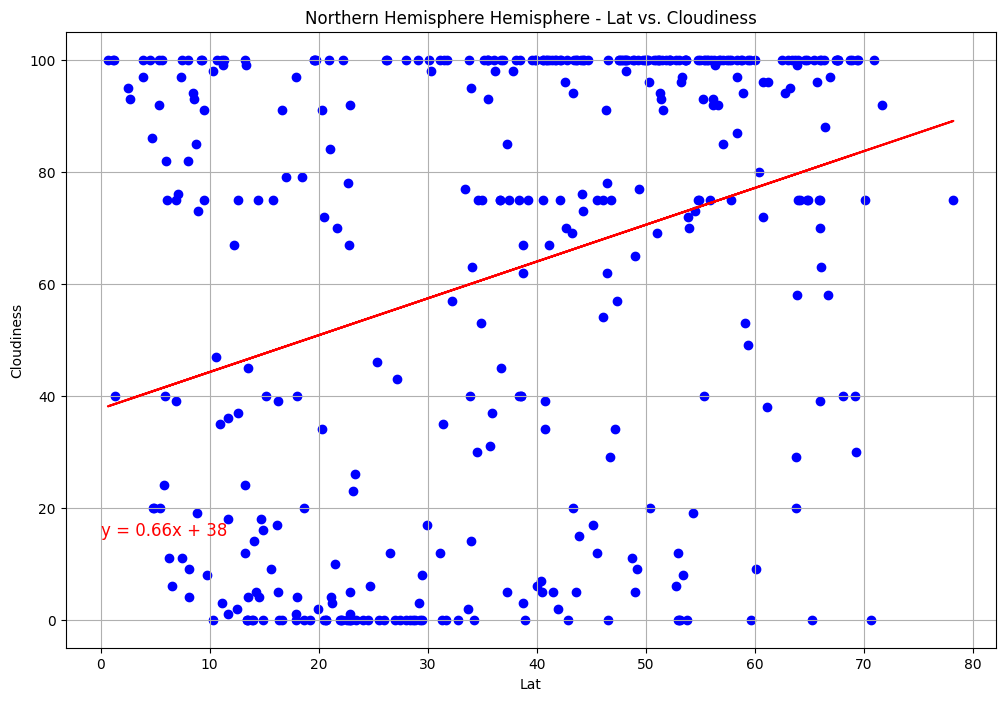

The r-value is: 0.31945679196432564


In [20]:
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]

#linear_regression(x_values,y_values, "Lat", "Max Temp (F)")
linear_regression(x_values, y_values, "Lat", "Cloudiness", "Northern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

Southern Hemisphere: Cloudiness vs. Latitude

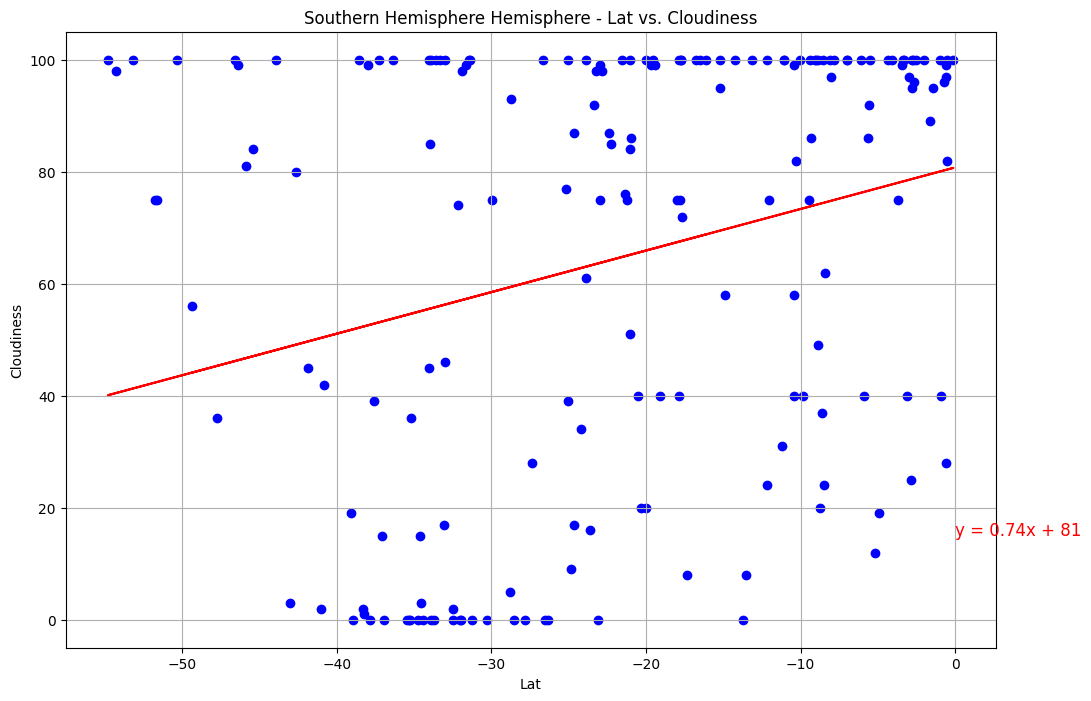

The r-value is: 0.27172137918365125


In [21]:
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]

#linear_regression(x_values,y_values, "Lat", "cloudiness")
linear_regression(x_values, y_values, "Lat", "Cloudiness", "Southern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

There is no correlation between latitude and cloudiness for both northern and soiuthern hemisphere. Scattered values are all over the plot.

Northern Hemisphere: Wind Speed vs. Latitude

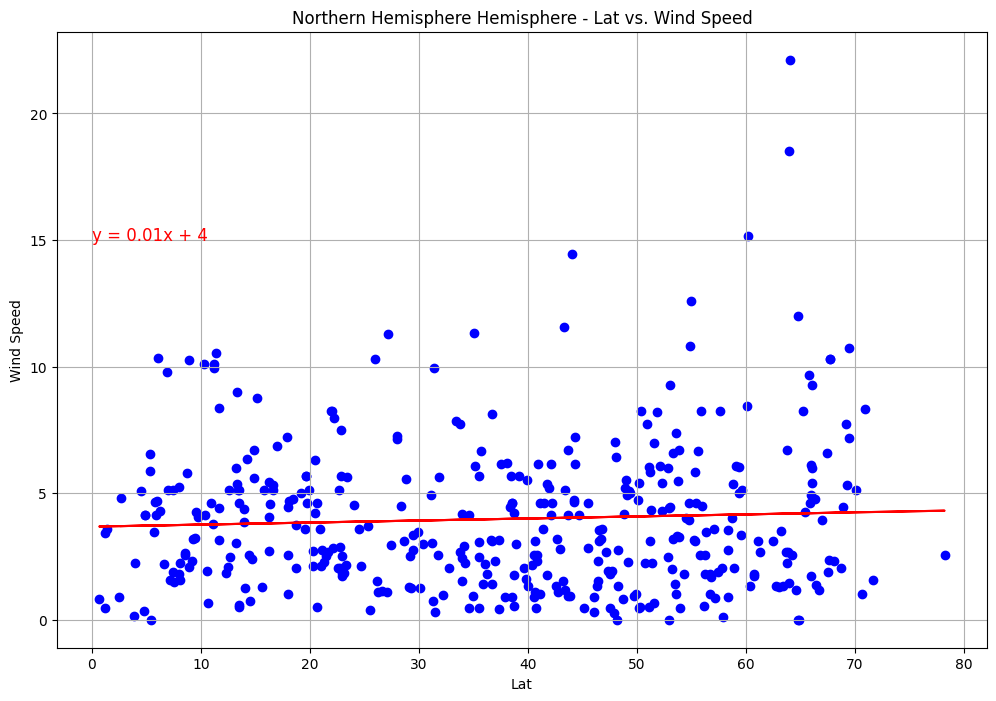

The r-value is: 0.05336417349946682


In [22]:
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]

#linear_regression(x_values,y_values, "Lat", "cloudiness")
linear_regression(x_values, y_values, "Lat", "Wind Speed", "Northern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

Southern Hemisphere: Wind Speed vs. Latitude

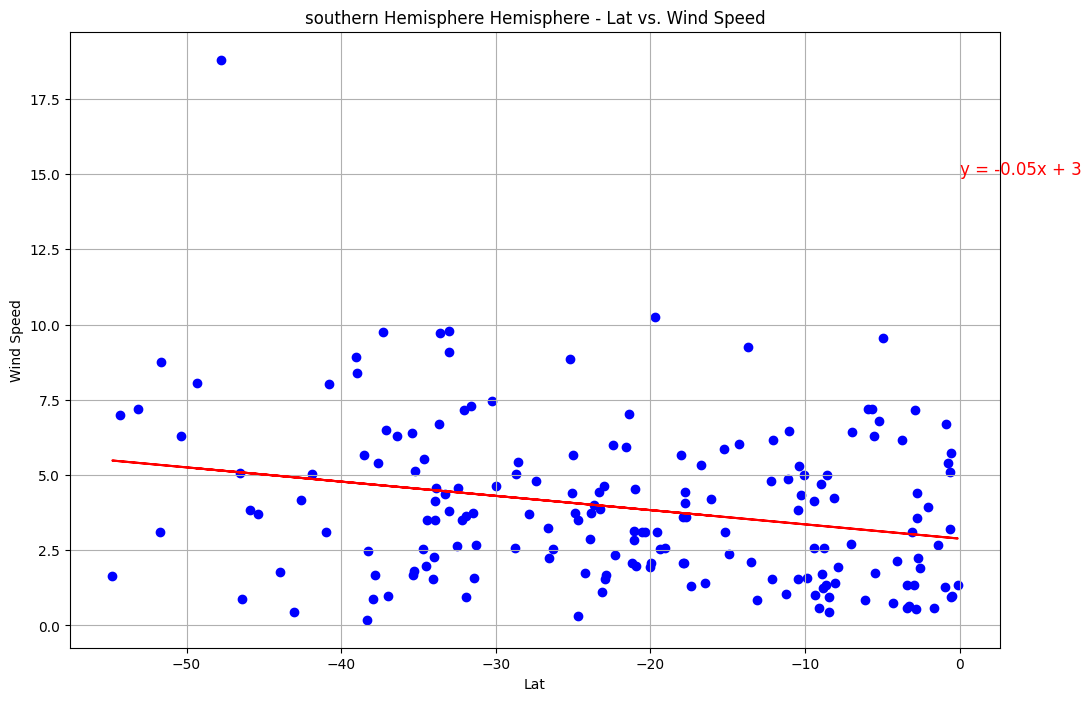

The r-value is: -0.25602006514939574


In [23]:
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]

#linear_regression(x_values,y_values, "Lat", "cloudiness")
linear_regression(x_values, y_values, "Lat", "Wind Speed", "southern Hemisphere", (0, 15))

plt.show

r, _ = pearsonr(x_values, y_values)
print("The r-value is:", r)

There is no correlation between latitude and cloudiness for both northern and soiuthern hemisphere. Evenly scattered values are on the plot.